In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/datagy/data/main/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df1=df[['age','bmi','children','charges']]
print(df1.corr())

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


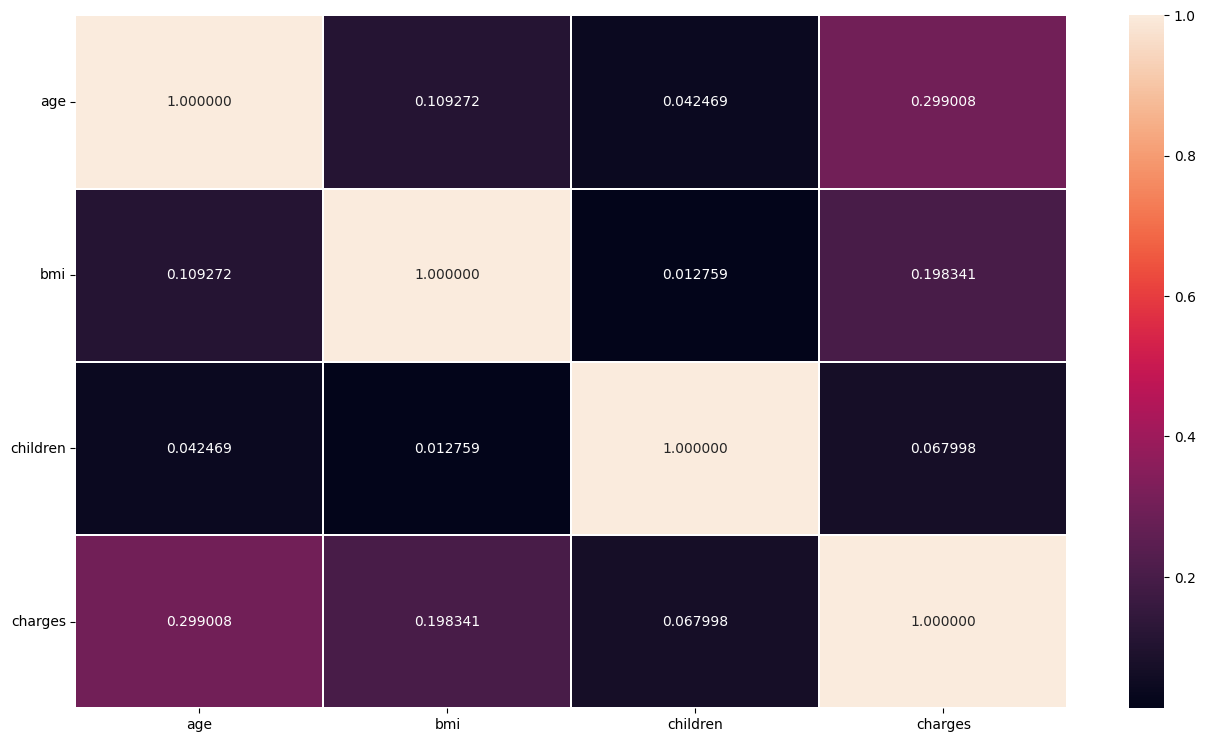

In [5]:
corr=df1.corr()
plt.figure(figsize=(16,9))
ax = sns.heatmap(corr,annot=True, fmt="f",linewidths=.1)
plt.yticks(rotation=0)
plt.show()

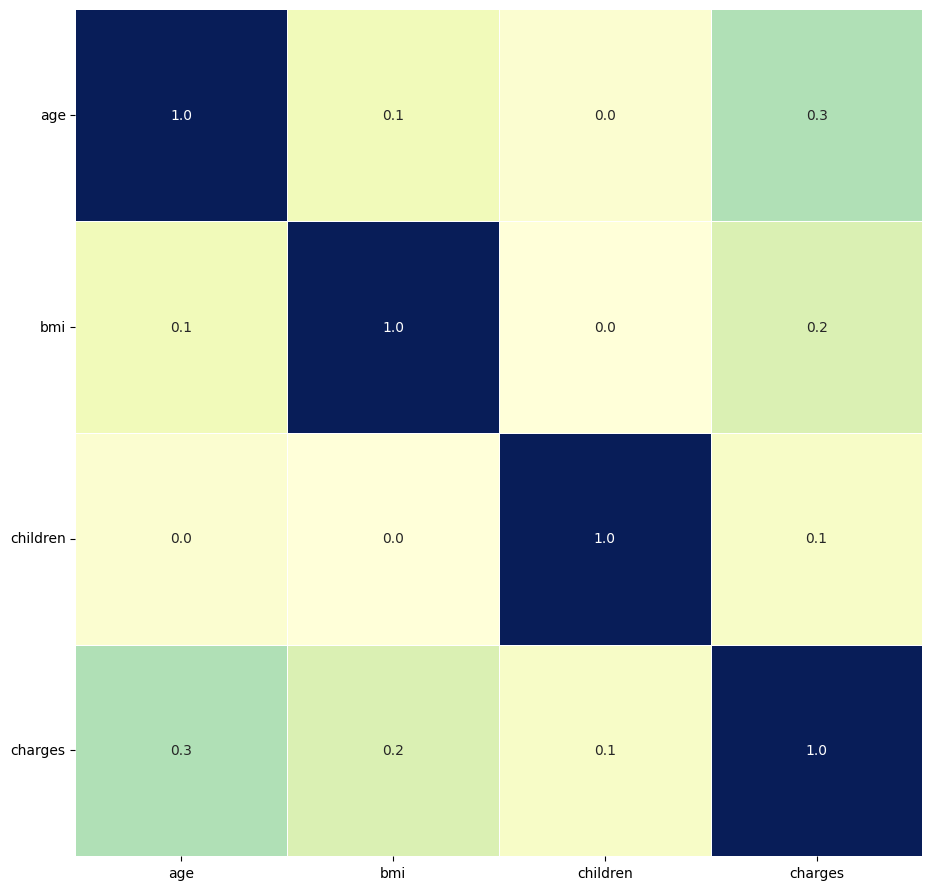

In [6]:
plt.figure(figsize=(20,11))
ax = sns.heatmap(corr,cmap="YlGnBu", linewidths=.5,annot=True ,fmt=".1f" , cbar=False,square=True)
plt.yticks(rotation=0)
plt.show()

only age and charges corr are near 1 comparitively

In [7]:
non_smokers = df[df['smoker'] == 'no']
non_smokers=non_smokers[['age','bmi','children','charges']]
print(non_smokers.corr())

               age       bmi  children   charges
age       1.000000  0.122638  0.033395  0.627947
bmi       0.122638  1.000000  0.019208  0.084037
children  0.033395  0.019208  1.000000  0.138929
charges   0.627947  0.084037  0.138929  1.000000


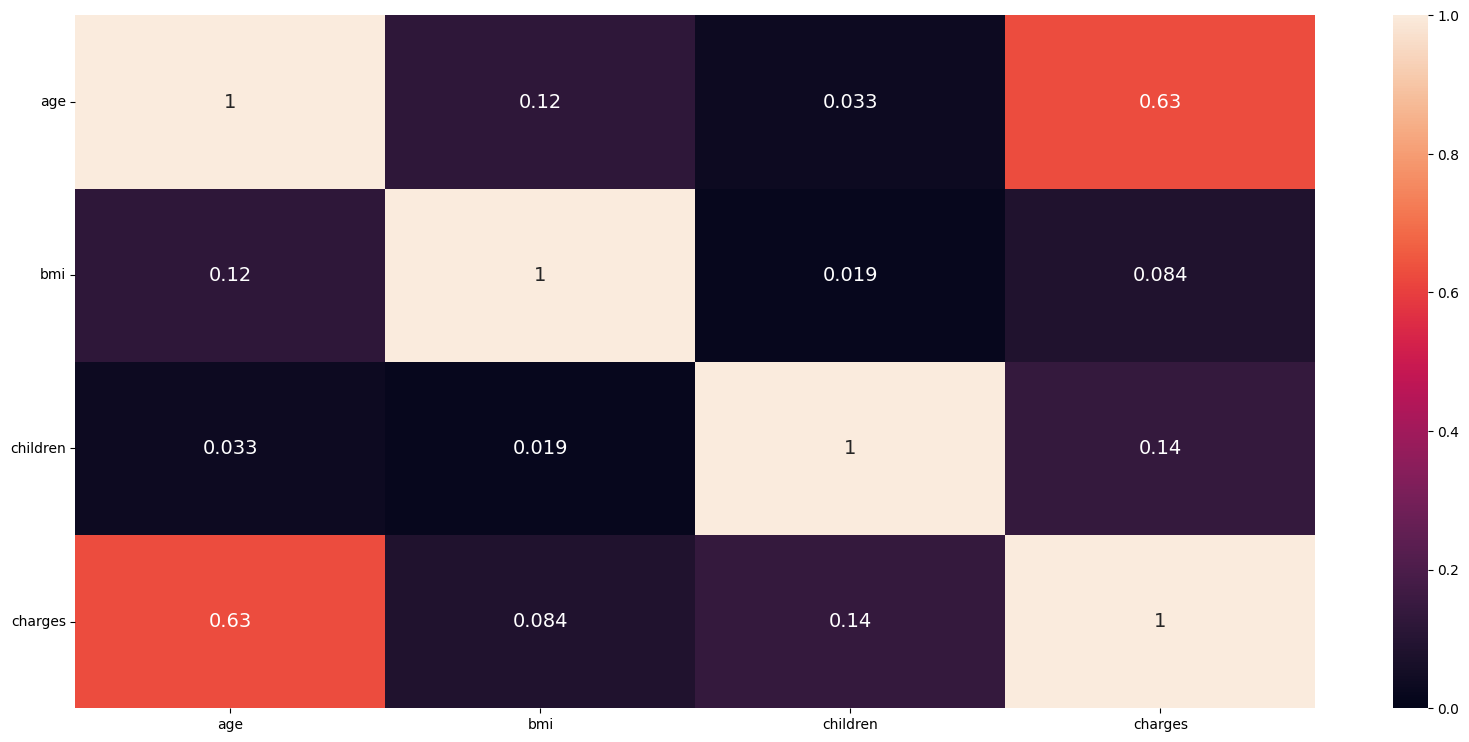

In [8]:
corr=non_smokers.corr()
plt.figure(figsize=(20,9))
ax = sns.heatmap(corr,annot=True,annot_kws={'size':14},vmin=0, vmax=1)
plt.yticks(rotation=0)
plt.show()

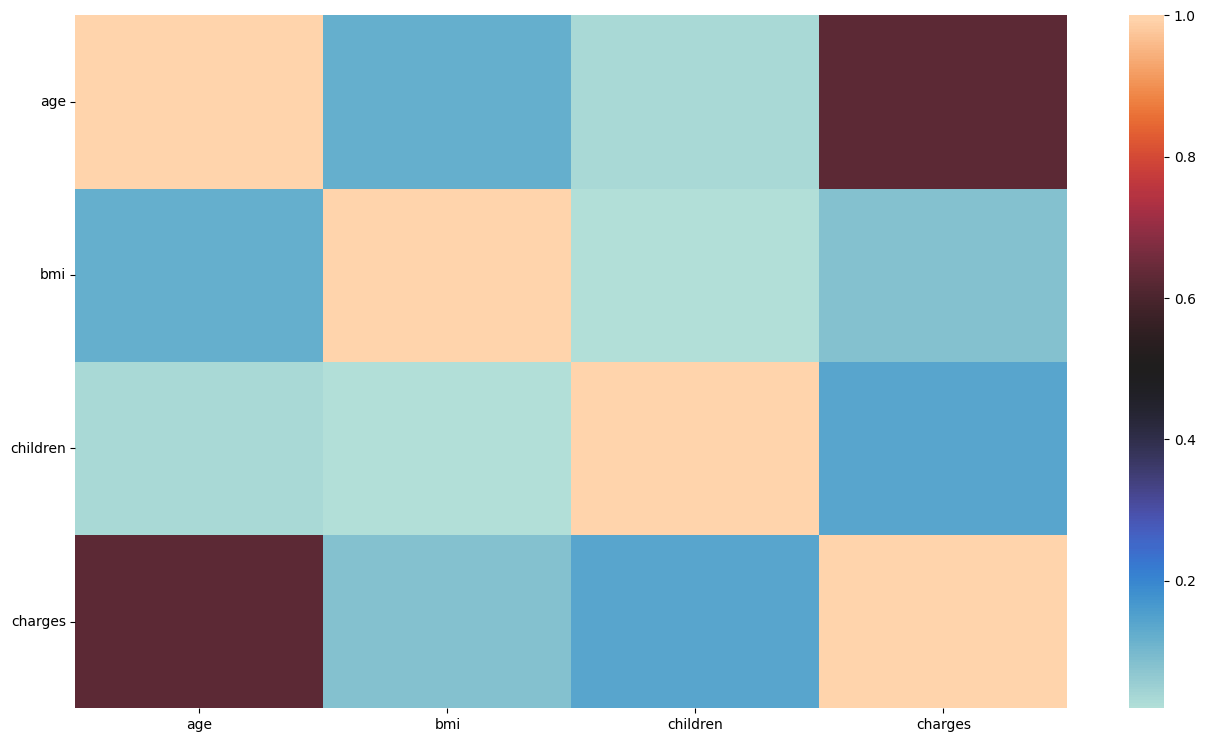

In [9]:
plt.figure(figsize=(16,9))
ax = sns.heatmap(corr,center=0.5)
plt.yticks(rotation=0)
plt.show()

age and charges' corr significantly increased

# Making model

In [10]:
model = LinearRegression()
# Creating two arrays for the feature and target 
X = non_smokers[['age']]
y = non_smokers['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)

# Fitting model and predicting

In [11]:
# Fitting our model
model.fit(X_train, y_train)
# Running Evaluation Metrics
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.36034548432652114
The rmse is:  4835.568320087433


In [12]:
# Creating new variables 
X = non_smokers[['age', 'bmi']] 
y = non_smokers['charges'] 
# Splitting the data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3) 
# Creating a new model and fitting it 
multi_model = LinearRegression() 
multi_model.fit(X_train, y_train) 
# Prediction new values 
predictions = multi_model.predict(X_test) 
r2 = r2_score(y_test, predictions) 
rmse = mean_squared_error(y_test, predictions, squared=False)
print(r2,'\n',rmse)

0.3638194119867344 
 4582.962132400652


In [13]:
df['smoker_int'] = df['smoker'].map({'yes':1, 'no':0}) # Creating new variables 
X = df[['age', 'bmi', 'smoker_int']] 
y = df['charges'] 
# Splitting the data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3) 
multi_model = LinearRegression() # Creating a new model and fitting it
multi_model.fit(X_train, y_train) # Prediction new values
predictions = multi_model.predict(X_test) 
r2 = r2_score(y_test, predictions) 
rmse = mean_squared_error(y_test, predictions) 
print(r2,'\n',rmse)

0.7498677744992397 
 36800998.970646925


In [14]:
print(multi_model.coef_) 
print(multi_model.intercept_) 


[  258.7793705    324.90452529 23627.08137908]
-11701.970025709326


In [15]:
coefficients = multi_model.coef_ 
intercept = multi_model.intercept_ 
def calculate_charges(age, bmi, smoker): 
    return (age * coefficients[0]) + (bmi * coefficients[1]) + (smoker * coefficients[2]) + intercept 
print(calculate_charges(33, 22, 0)) 

3985.6487572317074
